In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
df_market_data

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

---

### Prepare the Data

In [17]:
# Define the columns you want to normalize
columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d',
                        'price_change_percentage_14d', 'price_change_percentage_30d',
                        'price_change_percentage_60d', 'price_change_percentage_200d',
                        'price_change_percentage_1y']

# Select the columns you want to normalize
X = df_market_data[columns_to_normalize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
X_normalized = scaler.fit_transform(X)

# Replace the original columns with the normalized ones
df_market_data[columns_to_normalize] = X_normalized

# Display the DataFrame with normalized columns
print(df_market_data)


                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

### Find the Best Value for k Using the Original Data.

In [19]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [20]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [21]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}
# Create a DataFrame with the data to plot the Elbow curve

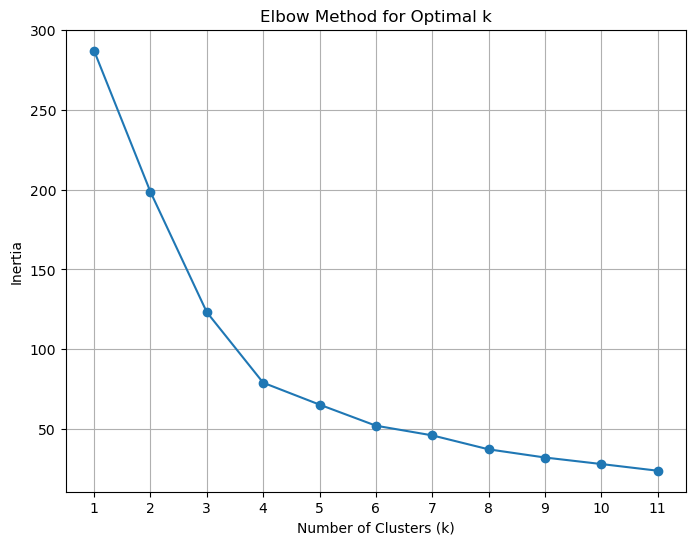

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_data["k"], elbow_data["inertia"], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Display the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The elbow curve's maximum value for k is usually found at the point where the inertia begins to drop more slowly. You may visibly recognise the "elbow" or the point on the plotted elbow curve when the inertia starts to exhibit a noticeable shift in slope. The value of k that corresponds to this "elbow" point is optimal.

I am unable to calculate the precise value of k from the description without viewing the plot in question. Examine the elbow curve to determine the value of k at which the rate of decrease of inertia begins to slow down.

### Cluster Cryptocurrencies with K-means Using the Original Data

In [36]:
# Initialize the K-Means model using the best value for k
k = 3  # Replace with the best value for k

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=k, random_state=0)

In [37]:
# Fit the K-Means model using the scaled data
kmeans.fit(X_normalized)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [38]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(X_normalized)

# Print the resulting array of cluster values.
print("Cluster Values:", predicted_clusters)

Cluster Values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [39]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

In [40]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_clusters'] = cluster_values

# Display sample data
print(df_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",  # Color the points by predicted cluster labels
    cmap="viridis",  # You can choose any colormap you prefer
    title="Cryptocurrency Clustering",
    hover_cols=["coin_id"],  # Display the cryptocurrency name on hover
    width=800,
    height=600,
)

# Show the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [43]:
# Fit and transform the scaled data using PCA
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# View the first five rows of the PCA DataFrame
pca_df.head()



,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [44]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({'Principal Component': ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
                                     'Explained Variance': explained_variance})

explained_variance_df


,Principal Component,Explained Variance
0,Principal Component 1,0.371986
1,Principal Component 2,0.347008
2,Principal Component 3,0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three principle components' combined explained variance comes to around 0.2388.

### Find the Best Value for k Using the PCA Data

In [51]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [55]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(X_pca)  # Use the PCA data
    inertia_values_pca.append(kmeans_pca.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [56]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_values_pca}
# Create a DataFrame with the data to plot the Elbow curve

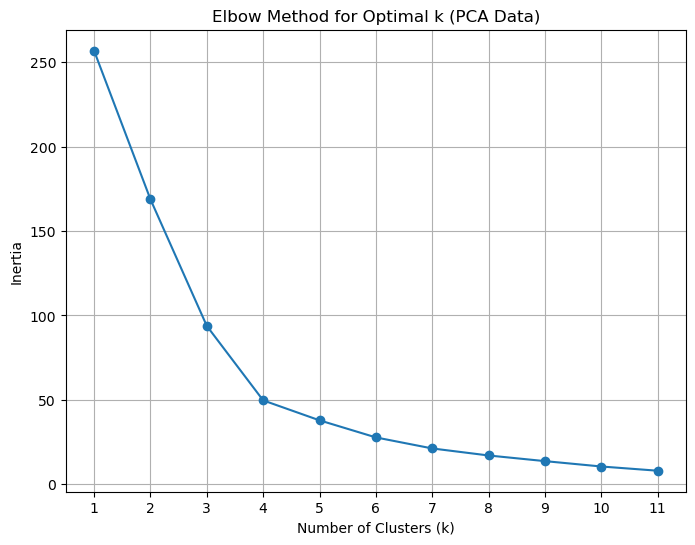

In [57]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_data_pca["k"], elbow_data_pca["inertia"], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** By analysing the elbow curve and locating the "elbow" point, one can ascertain the optimal value for k when utilising the PCA data. At this moment, increasing k further doesn't appreciably lessen inertia, signifying the best value for k. The elbow method's ideal value for k is frequently reached as the inertia begins to diminish more slowly.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k value discovered using the PCA data might not be the same as the best k value discovered using the original data. The characteristics employed and the degree of dimensionality reduction attained using PCA can affect the ideal k value. To find out if there are any differences, you should compare the best k value found using the PCA data with the best k value found using the original data.



### Cluster Cryptocurrencies with K-means Using the PCA Data

In [59]:
# Assuming you've already performed PCA
pca = PCA(n_components=3) 

# Fit the K-means model using the PCA data
kmeans_pca.fit(X_pca)  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=11, random_state=0)

In [60]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values_pca = kmeans_pca.predict(X_pca)

In [78]:
# Create a copy of the original DataFrame with PCA data
df_pca_copy = df_market_data.copy()

# Add a new column named 'predicted_clusters' with the predicted cluster values
df_pca_copy['predicted_clusters'] = cluster_values_pca


In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='predicted_clusters',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters Using PCA Data',
    cmap='viridis',  # Choose a color map
    colorbar=True
)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

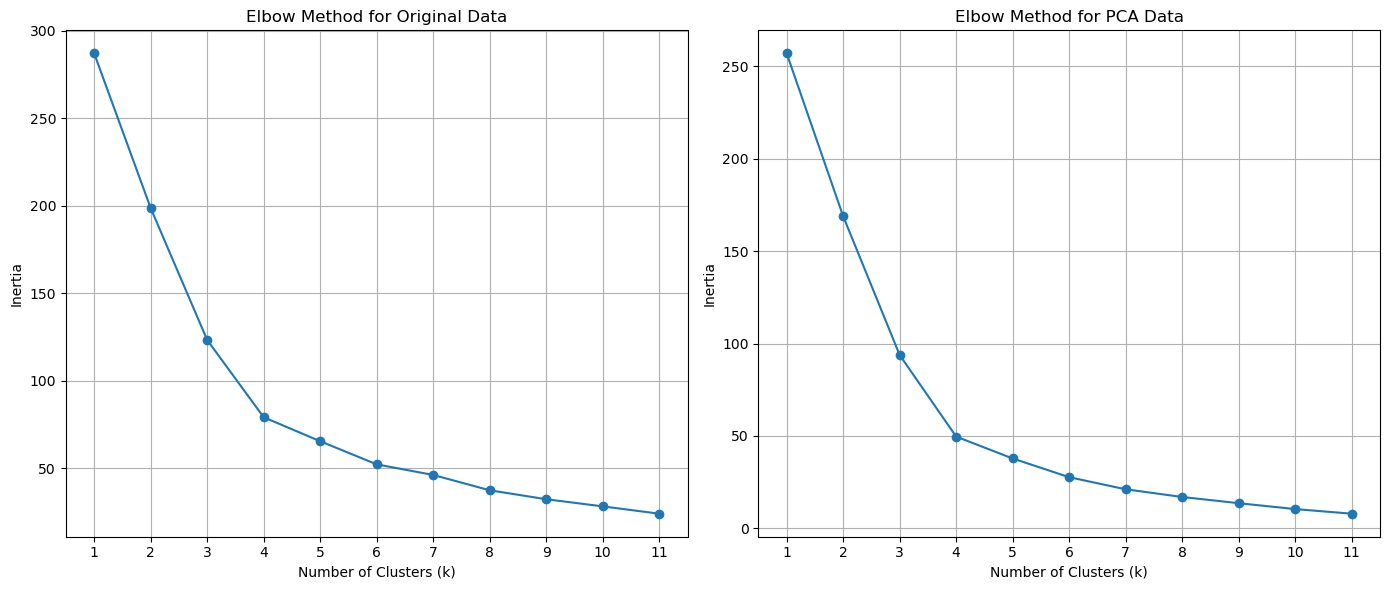

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

In [100]:
# Create a composite plot to contrast the Elbow curves
plt.figure(figsize=(14, 6))

# Plot the Elbow curve using the original data
plt.subplot(1, 2, 1)
plt.plot(elbow_data["k"], elbow_data["inertia"], marker='o', linestyle='-')
plt.title('Elbow Method for Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot the Elbow curve using the PCA data
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-')
plt.title('Elbow Method for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

# Create the scatter plot for the original data
scatter_original = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",  # Color the points by predicted cluster labels
    cmap="viridis",  # You can choose any colormap you prefer
    title="Cryptocurrency Clustering (Original Data)",
    hover_cols=["coin_id"],  # Display the cryptocurrency name on hover
    width=800,
    height=600,
)

# Create the scatter plot for PCA data
scatter_pca = df_pca_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='predicted_clusters',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters Using PCA Data',
    cmap='viridis',  # Choose a color map
    colorbar=True,
    width=800,
    height=600,
)

# Display both plots for comparison
(scatter_original + scatter_pca)


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** There is a trade-off between simplicity and information retention when utilising fewer characteristics (after dimensionality reduction with PCA) to cluster the data using K-Means. The clustering technique functions in a lower-dimensional space by minimising the number of characteristics. This could result in the clusters converging more quickly and having easier interpretations. When compared to utilising the original characteristics, it could potentially lead to some information loss. The best way to reduce dimensionality using PCA relies on the particular issue at hand and whether information loss is tolerable in exchange for the ease of use and effectiveness of clustering. Assessing the clustering's quality and appropriateness for the job is essential.
